In [1]:
# dataset: Salary_Data.csv
# location: https://mitu.cp.in/dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape

(30, 2)

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

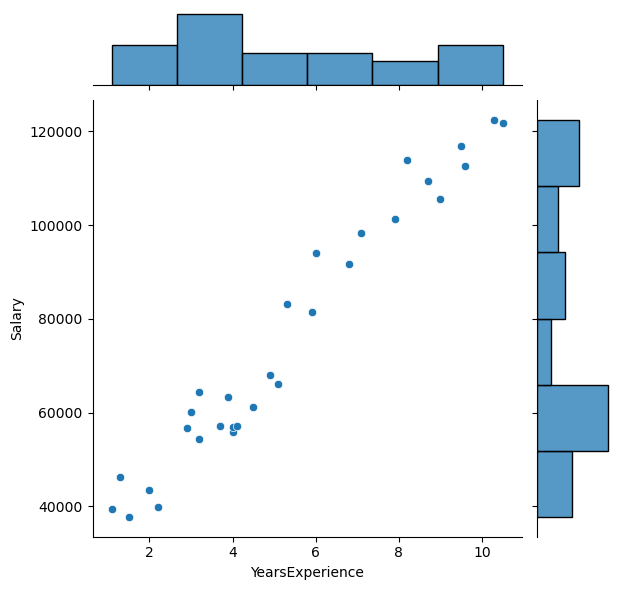

In [10]:
sns.jointplot(x = 'YearsExperience', y = 'Salary', data = df);

In [12]:
# separate input and output

# i/p

x = df['YearsExperience'].values

y = df['Salary']

In [14]:
x = x.reshape(30,1)

In [16]:
x.ndim

2

### cross validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size= 0.25,
                                                   random_state= 0)

### build the model

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = reg.predict(x_test)

In [21]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [22]:
newdf = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [23]:
newdf

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [25]:
# mean absolute error

sum(abs(y_test - y_pred) / len(y_pred))

3508.5455930660555

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [27]:
# mean squared error(MSE)

sum((y_test - y_pred) ** 2 / len(y_pred))

22407940.143340684

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

22407940.143340684

In [30]:
# Actual Accuracy / r2_score

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9779208335417602

In [31]:
reg.score(x, y)

0.955975487542377

### plot BFL

In [34]:
y_pred = reg.predict(x)

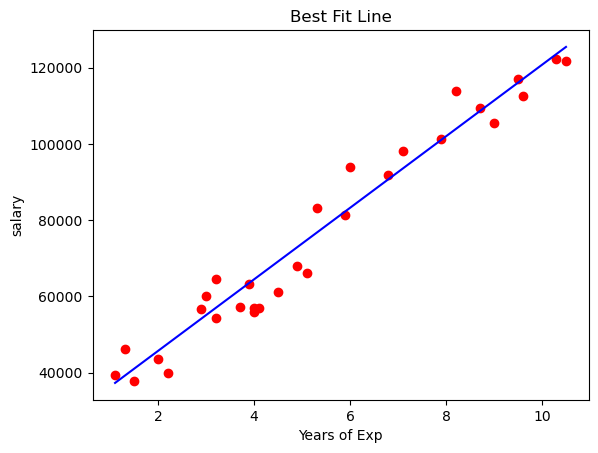

In [37]:
plt.xlabel('Years of Exp')
plt.ylabel('salary')
plt.title('Best Fit Line')
plt.scatter(x, y, marker= 'o', color = 'red');
plt.plot(x, y_pred, color = 'blue');